In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

import os

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
# LABEL ENCODING
label = {'Male' : 1, 'Female' : 2}
df['Genre'] = df['Genre'].replace(label)

Text(0.5, 1.0, 'Detect Outliers')

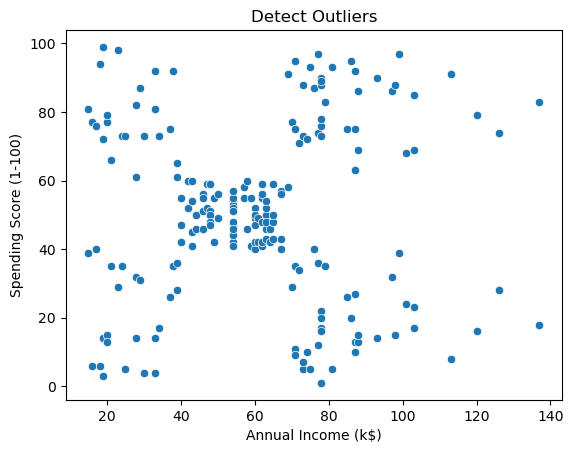

In [6]:
# DATA TRANSFORMATION
sb.scatterplot(x=df['Annual Income (k$)'] , y=df['Spending Score (1-100)'])
plt.title('Detect Outliers')
# No visible outliers

In [7]:
X = df.iloc[:,3:5]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:

os.environ["OMP_NUM_THREADS"] = '1'

# SILHOUETTE SCORE FOR CROSS VALIDATION OF CLUSTERS
sih = []
for cluster_number in range(2,10):
    km = KMeans(n_clusters = cluster_number,n_init=10)
    prediction = km.fit_predict(X)
    score = silhouette_score(X,prediction)
    sih.append(score)
sih

C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5393922132561455,
 0.5264283703685728,
 0.4585133619741466,
 0.4605043439759829]

Text(0, 0.5, 'Silhouette Score')

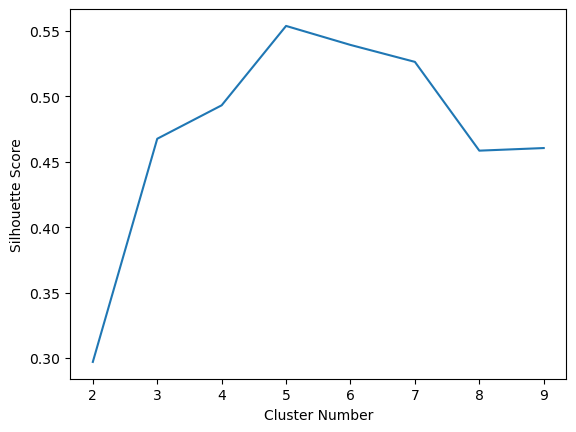

In [9]:
sih
sb.lineplot(x=range(2,10),y=sih)
plt.xlabel('Cluster Number')
plt.ylabel('Silhouette Score')
# Maximum Silhouette Score at 5 Clusters
# Therefore it optimal cluster number

In [10]:
# K MEANS CLUSTERING ALGORITHM
km = KMeans(n_clusters = 5, n_init = 10, random_state=2)
labels = km.fit_predict(X)
labels

C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [11]:
clusters = km.cluster_centers_
clusters

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

<Axes: title={'center': 'K Mean Clustering with 5 Clusters'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

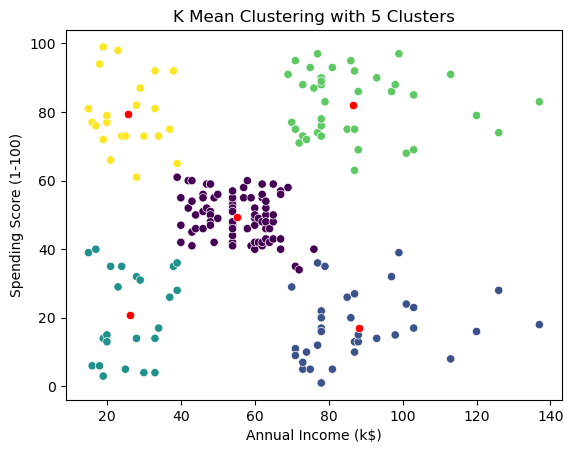

In [19]:
plt.title('K Mean Clustering with 5 Clusters')
sb.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=labels)
sb.scatterplot(x=clusters[:,0], y=clusters[:,1],color='red')

In [13]:
# AGGLOMERATIVE CLUSTERING ALGORITHM
model2 = AgglomerativeClustering(n_clusters=5)
clusters2 = model2.fit_predict(X)
clusters2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

<Axes: title={'center': 'Agglomerative Clustering with 5 Clusters'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

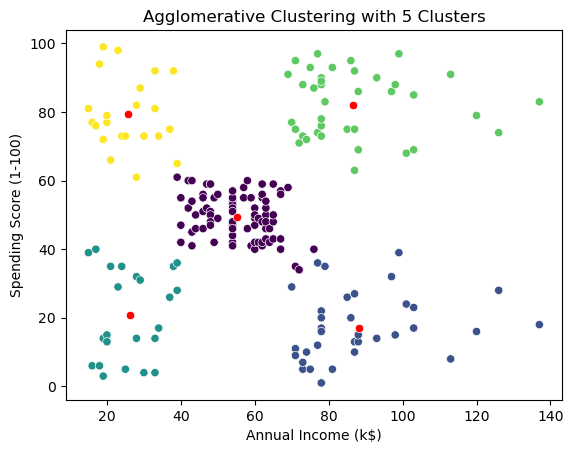

In [14]:
plt.title('Agglomerative Clustering with 5 Clusters')
sb.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'],c = labels)
sb.scatterplot(x = clusters[:,0],y = clusters[:,1], color = 'red')

In [15]:
elbow = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    km.fit_predict(X)
    elbow.append(km.inertia_)
elbow

C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kings\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30227.606513152015,
 25043.890043290045,
 21900.341350107527]

Text(0, 0.5, 'Error')

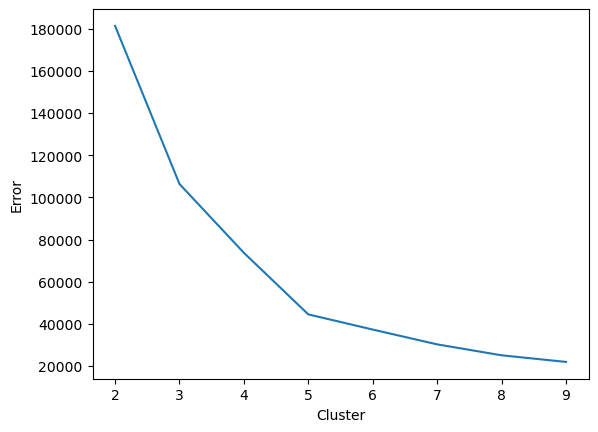

In [16]:
# Elbow Method Evaluation
sb.lineplot(x = range(2,10),y = elbow)
plt.xlabel('Cluster')
plt.ylabel('Error')

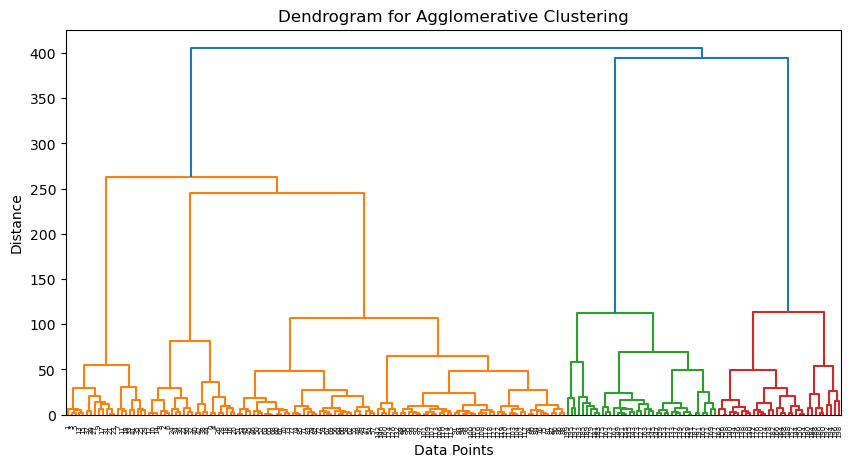

In [25]:
linkage_matrix = linkage(X, method='ward', metric='euclidean')

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, p=5, )
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()